# Scaling and Normalization

Scaling is the process of changing the range of the data. It is necessary for some algorithms that are sensitive to the scale of the data. It is also useful for data comparison and visualization.
 
Normalization changes the shape of the distribution of the data. It is useful when the data is not normally distributed and we want to apply algorithms that assume normality.

In [62]:
%%capture
# make sure the required packages are installed
%pip install numpy matplotlib pandas scikit-learn

## Data

Let's create a dataset with exponential data and visualize it.

Data summary:
	Minimum: 7.181593408377477e-05.
	1st quartile (Q1): 0.28281142861298764.
	Median (Q2): 0.6897242738312315.
	3rd quartile (Q3): 1.435192392346677.
	Maximum: 7.185367782387355.


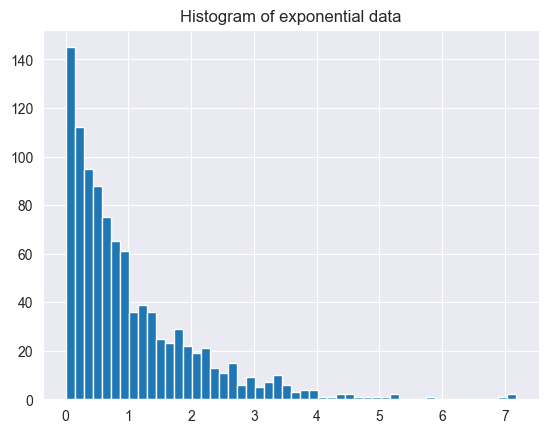

In [63]:
import numpy as np
exponential_data = np.random.exponential(size=1000)
import utils
import pandas as pd
print("Data summary:")
utils.five_number_summary(pd.Series(exponential_data), show=True)
# plot the histogram
import matplotlib.pyplot as plt
plt.hist(exponential_data, bins=50)
plt.title("Histogram of exponential data")
plt.show()

# Scaling

## Min-Max Scaling

Min-Max scaling is the process of scaling the data to a range of [0, 1]. It is calculated as follows: x_scaled = (x - min(x)) / (max(x) - min(x))

Let's apply Min-Max scaling to the data and visualize it. We will use scikit-learn. scikit-learn is a popular machine learning library in Python that provides tools for data preprocessing, modeling, and evaluation. We will use the `MinMaxScaler` class.

First five elements: [[0.95486976]
 [1.8058675 ]
 [1.76378167]
 [0.66552195]
 [0.44233065]].
Summary of data after scaling:
	Minimum: 0.0.
	1st quartile (Q1): 0.03934975177069383.
	Median (Q2): 0.095981078735935.
	3rd quartile (Q3): 0.1997301966561834.
	Maximum: 1.0000000000000002.


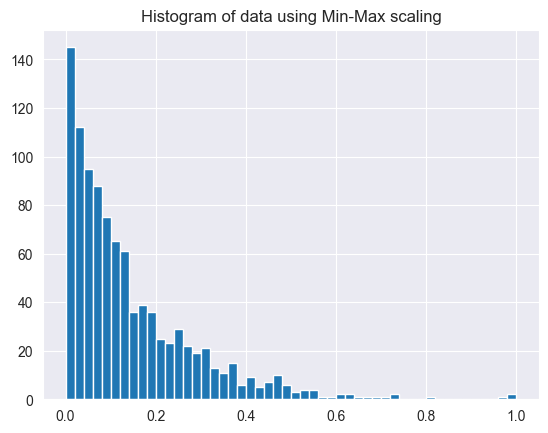

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# exponential_data holds a 1D vector, we need to reshape it to a 2D vector (the expected input for the scaler)
# instead of a vector of shape (1000,), we need a matrix of shape (1000, 1) 
two_d_data = exponential_data.reshape(exponential_data.shape[0], 1)
print(f"First five elements: {two_d_data[:5]}.")
scaler.fit(two_d_data)  # crates the scaler, based on the data (it is trained)
min_max_data = scaler.transform(two_d_data)  # applies the scaling
print("Summary of data after scaling:")
one_d_min_max_data = min_max_data.flatten()  # flatten the 2D array to a 1D array
utils.five_number_summary(pd.Series(one_d_min_max_data), show=True) 
# plot the histogram
plt.title("Histogram of data using Min-Max scaling")
plt.hist(one_d_min_max_data, bins=50)
plt.show()

## ✨ Questions ✨

1. Has the shape of the figure changed after Min-Max scaling?
2. Why?
3. What has been changed?

### Answers

*Write your answers here.*

1. No, the shape has not been changed.
2. In scaling, the shape of the data does not change.
3. The range of the data has been changed. From 0 to 5.77 to 0 to 1. 

## Standardization

Standardization (z-score scaling) is the process of scaling the data to have a mean of 0 and a standard deviation of 1. It is calculated as follows: x_standardized = (x - mean(x)) / std(x).


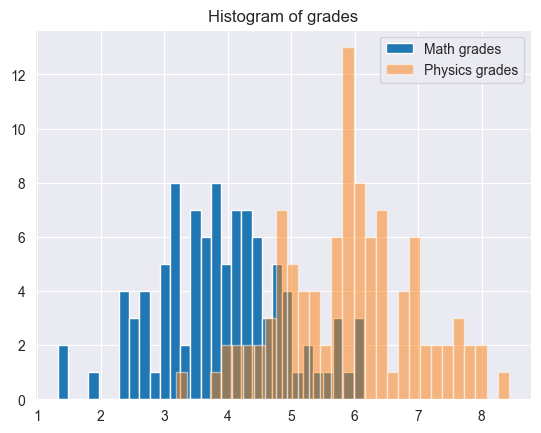

In [65]:
# grades for math and physics
math_grades = np.random.normal(loc=4, scale=1, size=100)  
physics_grades = np.random.normal(loc=6, scale=1, size=100) 

def plot_grades(math_grades_p: np.ndarray, physics_grades_p: np.ndarray, title: str) -> None:
    plt.hist(math_grades_p, bins=30, label="Math grades")
    plt.hist(physics_grades_p, bins=30, alpha=0.5, label="Physics grades")
    plt.legend()
    plt.title(title)
    plt.show()
    
plot_grades(math_grades, physics_grades, "Histogram of grades")

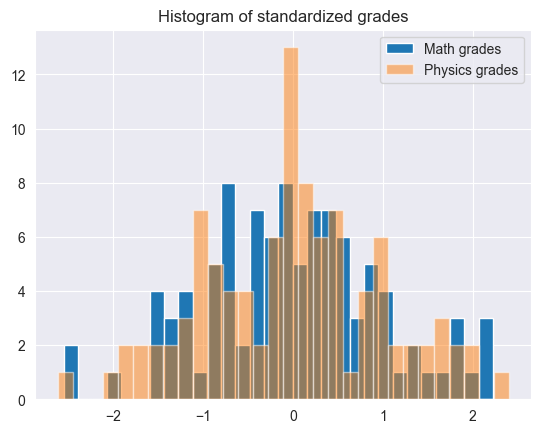

In [66]:
# standardize the data
from sklearn.preprocessing import StandardScaler
math_scaler, physics_scaler = StandardScaler(), StandardScaler()
math_grades = math_grades.reshape(math_grades.shape[0], 1)
physics_grades = physics_grades.reshape(physics_grades.shape[0], 1)
math_scaler.fit(math_grades)
physics_scaler.fit(physics_grades)
standardized_math_grades = math_scaler.transform(math_grades).flatten()
standardized_physics_grades = physics_scaler.transform(physics_grades).flatten()
plot_grades(standardized_math_grades, standardized_physics_grades, "Histogram of standardized grades")

## ✨ Questions ✨
1. What would be the result of comparing a grade of 5 in math with a grade of 5 in physics after standardization?
2. Why?
3. Implement: Compare a grade of 5 in math with a grade of 6 in physics after standardization. Which one is higher?

In [67]:
# Answers

# Write your answers here.

# 1. Math grade 5 would be higher than physics grade 5.
# 2. Because, compared to the rest of grandes in the same subject, the grade of 5 in math is higher than the grade of 5 in physics its group. That is, the average of math grades is lower than the average of physics grades.
# 3. Let's compare the grades.
standardized_math_grade_5 = math_scaler.transform([[5]]).flatten()
standardized_physics_grade_6 = physics_scaler.transform([[6]]).flatten()
print(f"Standardized math grade 5: {standardized_math_grade_5}")
print(f"Standardized physics grade 6: {standardized_physics_grade_6}")
print(f"{'Math' if standardized_math_grade_5 > standardized_physics_grade_6 else 'Physics'} grade is higher.")

Standardized math grade 5: [1.08784904]
Standardized physics grade 6: [0.07507076]
Math grade is higher.


## Normalization

Normalization is the process of changing the shape of the distribution of the data. It is useful when the data is not normally distributed and we want to apply algorithms that assume normality. 

There are different normalization techniques such as log and square root transformations. Other approaches include Box Cox and Yeo-Johnson transformations. The sk-learn `PowerTransformer` class can be used to apply these transformations.

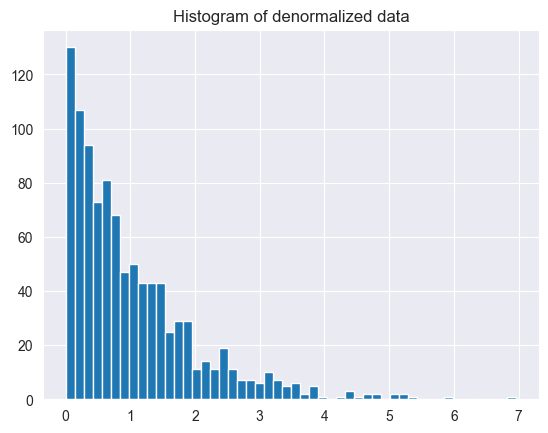

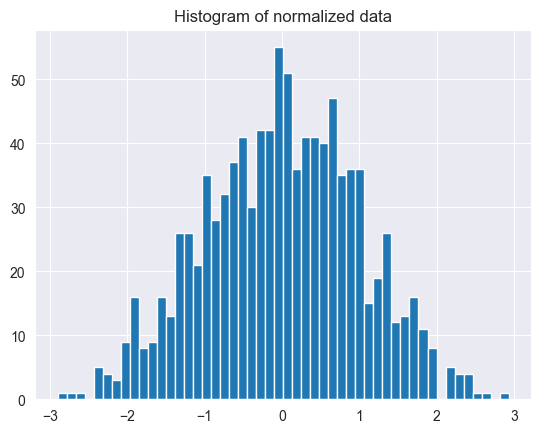

In [68]:
from sklearn.preprocessing import PowerTransformer
exponential_data = np.random.exponential(size=1000)
data = exponential_data.reshape(exponential_data.shape[0], 1)
power_transformer = PowerTransformer(method="box-cox")
normalized_data = power_transformer.fit_transform(data).flatten()

plt.hist(exponential_data, bins=50)
plt.title("Histogram of denormalized data")
plt.show()

plt.hist(normalized_data, bins=50)
plt.title("Histogram of normalized data")
plt.show()

## ✨ Questions ✨

1. Can you apply the Tukey's fences method to the exponential data to detect outliers?
2. Why?
3. Can you apply Tukey's fences method to the normalized data to detect outliers?
4. Why?

### Answers

*Write your answers here.*

1. No, you cannot apply Tukey's fences method to the exponential data to detect outliers.
2. Tukey's fences can only be applied to symmetric distributions. The exponential distribution is not symmetric.
3. Yes, you can apply Tukey's fences method to the normalized data to detect outliers.
4. The Box-Cox transformation made the data symmetric.